#### Has network latency increased since ISP?

Ho - latency has remained the same 
Ha - latency  has increased or decreased

### Is the website redesign working functionally and all the navigation links work properly?

Ho - do all links work and correct infor?.
Ha - not all website links work and information is not correct.
true positive - all links work and website shows the correct informtion.
false positive - the link is broken but the information is right.
click a link and it works but shows wrong information.
true negative - click a link and it works but shows wrong information.
false negative - links are broken and information is wrong. 

### Effectiveness of an Ad
Ho- sales did not increase or decrease revenue
Ha - sales increased or decreased over time. 

In [27]:
from pydataset import data

1.  ttest - two observed means that depend on the population of students. 

2.  ttest - two observed means that depend on adults who drink milk and who dont drink milk. 

3. ttest - two observed means that depend on gas prices in New Mexico and Texas.

4. ANOVA - measure the distance between all three observed means. 

In [28]:
import pandas as pd
import matplotlib.pyplot as plt
import scipy.stats as stats
import seaborn as sns
import env

mpg = data('mpg')

In [29]:
mpg.head()

,manufacturer,model,displ,year,cyl,trans,drv,cty,hwy,fl,class
1,audi,a4,1.8,1999,4,auto(l5),f,18,29,p,compact
2,audi,a4,1.8,1999,4,manual(m5),f,21,29,p,compact
3,audi,a4,2.0,2008,4,manual(m6),f,20,31,p,compact
4,audi,a4,2.0,2008,4,auto(av),f,21,30,p,compact
5,audi,a4,2.8,1999,6,auto(l5),f,16,26,p,compact


In [35]:
mpg.count()

manufacturer    234
model           234
displ           234
year            234
cyl             234
trans           234
drv             234
cty             234
hwy             234
fl              234
class           234
dtype: int64

### Is there a difference in fuel efficiency between cars from 2008 vs 1999

In [37]:
mpg.columns

Index(['manufacturer', 'model', 'displ', 'year', 'cyl', 'trans', 'drv', 'cty',
       'hwy', 'fl', 'class', 'average_mileage'],
      dtype='object')

In [32]:
mpg.isna().sum()

manufacturer    0
model           0
displ           0
year            0
cyl             0
trans           0
drv             0
cty             0
hwy             0
fl              0
class           0
dtype: int64

In [36]:
mpg['average_mileage'] = (mpg.hwy+mpg.cty)/2 

### Independent t-test (a.k.a Two Sample t-test)

Goal: Find a difference in fuel efficiency between cars from 2008 vs 1999

H0 Group A - is no difference 
Ha Group B - increase or decrease in vehicles

Verify assumptions:

- Check that we have 30 observations: yes, 234

- Independence



<AxesSubplot:>

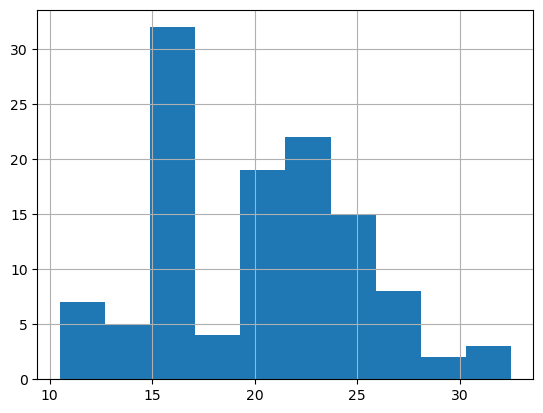

In [83]:
year_08 = mpg[mpg.year == 2008].average_mileage # year 2008 with average mileage returned
year_08.hist()

<AxesSubplot:>

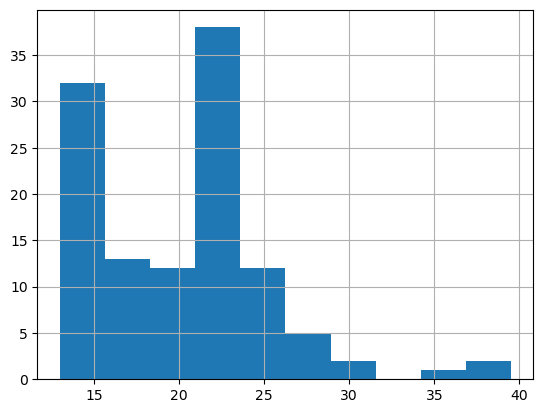

In [84]:
year_99 = mpg[mpg.year == 1999].average_mileage # year 1999 with average mileage returned
year_99.hist()

In [48]:
α = 0.05 # Significance level

In [49]:
t, p = stats.ttest_ind(year_08, year_99, equal_var=False)

In [51]:
p < α


False

In [53]:
# It t-statistic < 0
print("Is t < 0?", t < 0)

# Is p/2 < alpha
print("Is p/2 < alpha?", p/ 2 < α)

Is t < 0? True
Is p/2 < alpha? False


In [56]:
if p < α:
    print("We reject $H_{0}$")
else:
    print("We fail to reject $H_{0}$")


We fail to reject $H_{0}$


Takeaway:  We failed to reject the null hypothesis, there is no difference in fuel efficiency between cars made in 1999 and 2008. 

### Are compact cars more fuel-efficient than the average car?

In [ ]:
### Independent t-test (a.k.a Two Sample t-test)

Goal: Find a difference in fuel efficiency between cars compact cars and average cars?

H0 Group A - is no difference 
Ha Group B - increase or decrease in vehicles

Verify assumptions:

- Check that we have 30 observations: yes, 234

- Independence

variance


In [176]:
compact_mileage = mpg[mpg["class"] == "compact"].average_mileage.mean()

In [182]:
not_compact_mileage = mpg.average_mileage.mean()

<AxesSubplot:>

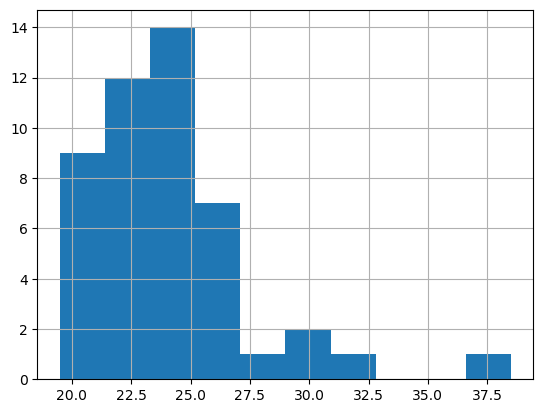

In [96]:
compact_mileage.hist()

<AxesSubplot:>

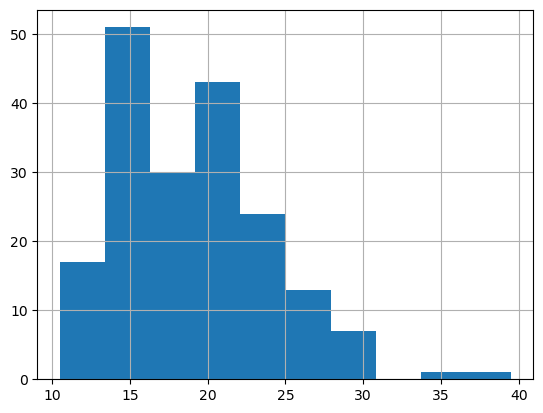

In [97]:
not_compact_mileage.hist()

In [183]:
t, p = stats.ttest_1samp(compact_mileage, not_compact_mileage)

t, p

/var/folders/51/1y9bskdx161fnwxyf68jcl540000gn/T/ipykernel_33644/2246291425.py:1: RuntimeWarning: Precision loss occurred in moment calculation due to catastrophic cancellation. This occurs when the data are nearly identical. Results may be unreliable.
  t, p = stats.ttest_1samp(compact_mileage, not_compact_mileage)
/opt/homebrew/anaconda3/lib/python3.9/site-packages/scipy/stats/_stats_py.py:1250: RuntimeWarning: divide by zero encountered in true_divide
  var *= np.divide(n, n-ddof)  # to avoid error on division by zero
/opt/homebrew/anaconda3/lib/python3.9/site-packages/scipy/stats/_stats_py.py:1250: RuntimeWarning: invalid value encountered in double_scalars
  var *= np.divide(n, n-ddof)  # to avoid error on division by zero


(nan, nan)

In [184]:
α = .05

if t > 0 and p/2 <= α:
    print('Reject null')
else: 
    print('Fail to reject null')

Fail to reject null


### Do manual cars get better gas mileage than automatic cars?

In [ ]:
Goal: Find a difference in fuel efficiency between manual cars and automatic cars?

H0 Group A - is no difference 
Ha Group B - increase or decrease in vehicles

Verify assumptions:

- Check that we have 30 observations: yes, 234

- Independence

variance


In [122]:
mpg['is_automatic']=mpg.trans.str.contains('auto')==True

In [124]:
mpg['is_automatic'] = mpg['is_automatic'].replace({True: 'Automatic', False: 'Manual'})

In [129]:
auto_mileage= mpg[mpg['is_automatic'] == 'Automatic'].average_mileage

In [128]:
manual_mileage = mpg[mpg['is_automatic'] == 'Manual'].average_mileage

<AxesSubplot:>

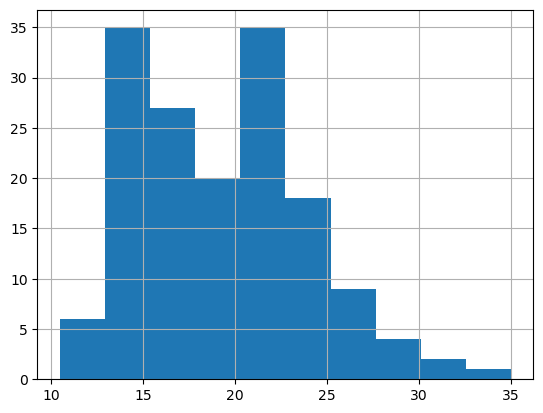

In [130]:
auto_mileage.hist()

<AxesSubplot:>

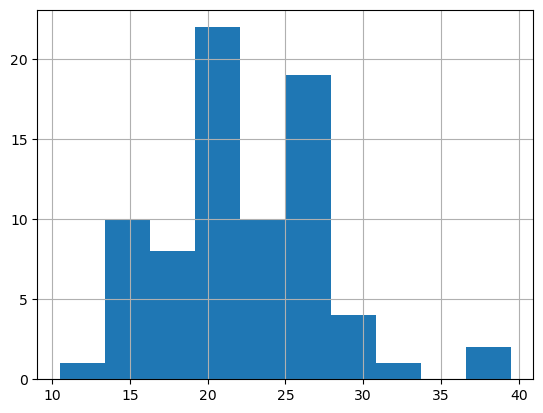

In [131]:
manual_mileage.hist()

In [160]:
t, p = stats.ttest_ind(auto_mileage, manual_mileage, equal_var=False)

In [161]:
# It t-statistic < 0
print("Is t < 0?", t < 0)

# Is p/2 < alpha
print("Is p/2 < alpha?", p/ 2 < α)

Is t < 0? True
Is p/2 < alpha? True


In [162]:
if p < α:
    print("We reject $H_{0}$")
else:
    print("We fail to reject $H_{0}$")

We reject $H_{0}$


In [135]:
from scipy import stats
from pydataset import data

In [136]:
office_one = stats.norm(90, 15)

In [137]:
office_two = stats.norm(100, 20)

In [138]:
office_one

In [141]:
office_one.rvs(40)

array([102.70304492,  93.75075956, 113.36225108,  89.76627615,
       107.59974513,  88.07171478,  75.2697791 ,  60.24238585,
        66.91399828,  76.03589565, 110.19362226, 130.59251395,
        83.58384188,  84.04774293, 107.63176863,  84.32240627,
        72.36270749,  86.67949931,  90.07300201, 113.01373581,
        75.37608694,  90.08582423,  77.53909628,  91.2387765 ,
        91.94118563, 118.33402692, 113.00691983, 109.75895458,
        72.45088298,  90.51192655, 108.37250268,  99.49154423,
        68.65371904,  60.19348416,  87.89106948, 101.39281335,
        75.19373104,  85.26553589,  58.57151065,  95.03408406])

In [142]:
dist_one = office_one.rvs(40)
dist_two = office_two.rvs(50)

In [143]:
dist_one.var(), dist_two.var() #checking variances in both samples to find the difference

(220.34364215466593, 383.97281914074114)

In [144]:
stats.levene(dist_one, dist_two) #pvalue

LeveneResult(statistic=1.2443037224853262, pvalue=0.267680149888091)

In [152]:
t, p = stats.ttest_ind(dist_one, dist_two, equal_var=False) # order of left to right, comparing the difference from 0 to 1, could result in negative value.
t, p

(-1.5923321555944177, 0.11490453404881472)

In [155]:
t, p = stats.ttest_ind(dist_two, dist_one, equal_var=False)

t, p

(1.5923321555944177, 0.11490453404881472)

In [ ]:
Null: There is no difference between the two distributions
Alternative: There is a significant difference between the two distributions

In [150]:
α = 0.05

In [156]:
if p <= α:
    print('reject null')
else:
    print('Fail to reject null')

Fail to reject null


Takeaway: we rejected the null hypothesis, there is a significant difference between the two offices.

## III. Correlation
### Answer with the type of stats test you would use (assume normal distribution):

### Answer with the type of stats test you would use (assume normal distribution):
- Is there a relationship between the length of your arm and the length of your foot?

Pearson 

- Do guys and gals quit their jobs at the same rate?

Independent T-Test

- Does the length of time of the lecture correlate with a students grade?
spearmean r

## 1. Use the telco_churn data.

In [215]:
import pandas as pd
import env

url = f'mysql+pymysql://{env.username}:{env.password}@{env.host}/telco_churn'
customer_df = pd.read_sql('select * FROM customers', url)


In [216]:
customer_df.head()

,customer_id,gender,senior_citizen,partner,dependents,tenure,phone_service,multiple_lines,internet_service_type_id,online_security,...,device_protection,tech_support,streaming_tv,streaming_movies,contract_type_id,paperless_billing,payment_type_id,monthly_charges,total_charges,churn
0,0002-ORFBO,Female,0,Yes,Yes,9,Yes,No,1,No,...,No,Yes,Yes,No,2,Yes,2,65.6,593.3,No
1,0003-MKNFE,Male,0,No,No,9,Yes,Yes,1,No,...,No,No,No,Yes,1,No,2,59.9,542.4,No
2,0004-TLHLJ,Male,0,No,No,4,Yes,No,2,No,...,Yes,No,No,No,1,Yes,1,73.9,280.85,Yes
3,0011-IGKFF,Male,1,Yes,No,13,Yes,No,2,No,...,Yes,No,Yes,Yes,1,Yes,1,98.0,1237.85,Yes
4,0013-EXCHZ,Female,1,Yes,No,3,Yes,No,2,No,...,No,Yes,Yes,No,1,Yes,2,83.9,267.4,Yes


- Does tenure correlate with monthly charges?

In [217]:
customer_df.columns

Index(['customer_id', 'gender', 'senior_citizen', 'partner', 'dependents',
       'tenure', 'phone_service', 'multiple_lines', 'internet_service_type_id',
       'online_security', 'online_backup', 'device_protection', 'tech_support',
       'streaming_tv', 'streaming_movies', 'contract_type_id',
       'paperless_billing', 'payment_type_id', 'monthly_charges',
       'total_charges', 'churn'],
      dtype='object')

In [273]:
#customer_df.loc[customer_df['churn']== 'Yes'].total_charges.astype('float').mean() # previous entry for churn calculation

charges_df = customer_df[['monthly_charges', 'tenure']] #showing the monthly customers and tenure columns
charges_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 2 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   monthly_charges  7043 non-null   float64
 1   tenure           7043 non-null   int64  
dtypes: float64(1), int64(1)
memory usage: 110.2 KB


<AxesSubplot:xlabel='tenure', ylabel='monthly_charges'>

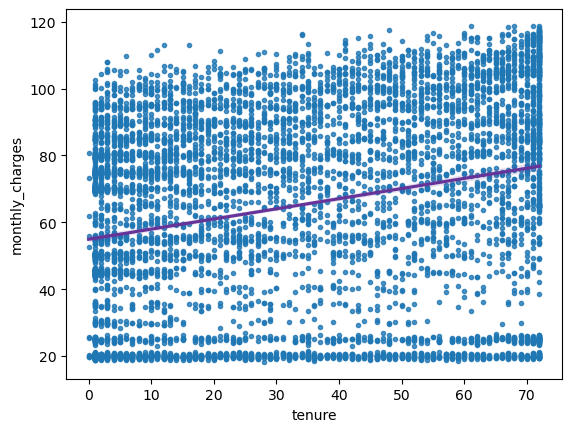

In [272]:
sns.regplot(x='tenure', y='monthly_charges',  # plotting data that shows the correlation of the monthly charges and tenure for each customer
            data=charges_df, marker='.', 
            line_kws={'color': 'rebeccapurple'})

In [274]:
α = 0.05 # setting the alpha = .05

In [278]:
r, p = stats.spearmanr(charges_df.tenure, charges_df.monthly_charges) # no order necessary 
## Showing the correlation strength of the best fit line correlation and p-value
r, p

(0.27641678933130215, 1.0271266876409408e-123)

In [279]:
# defining a function that prints our findings and calls the variable to print whether to reject the H_0 or fail to reject(H_a)
def findings(α, p):
    if p < α:
        print( f'reject the null hypothesis.there is a linear correalation better monthly charges and tenure (p-value: {p})')
    else:
        print(f'we fail to reject the null hypothesis that there is a linear correalation between monthly charges and tenure (p-value: {p})')

findings(α, p)      

reject the null hypothesis.there is a linear correalation better monthly charges and tenure (p-value: 1.0271266876409408e-123)


**Takeaways**

There is a correlation between monthly charges and tenure. 
With an r of .28, we can say that there is a correlation with an increase/decrease in monthly payments and tenure

### Does Tenure correlate with total charges?

- H_0: There is no linear correlation between tenure and total charges.
- H_a: There is a linear correlation between tenure and total charges.

In [291]:
#Setting the alpha
α = 0.05 

# Selecting the data
total_charges_tenure_df = customer_df[['tenure', 'total_charges']]
total_charges_tenure_df

,tenure,total_charges
0,9,593.3
1,9,542.4
2,4,280.85
3,13,1237.85
4,3,267.4
...,...,...
7038,13,742.9
7039,22,1873.7
7040,2,92.75
7041,67,4627.65
